# Задание 9
## 9.1

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

In [8]:
def get_A(N): 
    return np.fromfunction(lambda i, j: 1 / (i + j + 1), (N,N))

In [9]:
def fixed_point_iteration(N, M):
    prev = np.ones(N)
    A = get_A(N)
    cur = A @ prev
    ans = []
    for i in range(M):
        prev = cur
        cur = A @ cur
        ans.append(np.dot(prev, cur) / np.dot(prev, prev))
    return ans


In [357]:
def plot_difference_max():
    N = 500
    res = fixed_point_iteration(4, N)
    ideal = res[-1]
    errors = [np.log10(abs(ideal - res_i)) for res_i in res]
    plt.plot([np.log10(i) for i in range(N) ], errors)
    plt.xlabel('log(N)')
    plt.ylabel('log(error)')
    plt.title('Max eigen value')
    plt.show()  

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


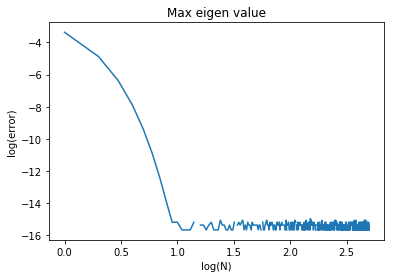

In [358]:
plot_difference_max()

Сходимость весьма быстрая, уже при 10 достигается нужное значение.

In [365]:
def plot_max_eigenvalue():
    N = 51
    M = 100
    vals_fixed_point = [i ** (fixed_point_iteration(i, M)[-1] / 3) for i in range(1, N)]
    val_np = [i ** (max(np.linalg.eigh(get_A(i))[0]) / 3) for i in range(1, N)]
    plt.plot([i for i in range(1, N) ], vals_fixed_point, label='fixed_point')
    plt.plot([i for i in range(1, N) ], val_np, label='numpy')
    print('a = ' + str(val_np[49] / 50))
    plt.xlabel('N')
    plt.ylabel('N ** (eigenvalue / 3)')
    plt.title('Max eigenvalue')
    plt.legend()
    plt.show()  

a = 0.2998370230048715


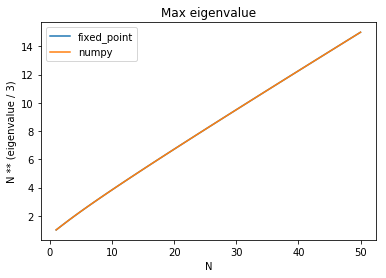

In [366]:
plot_max_eigenvalue()

Получили прямую с наклоном $a \approx 0.3$, значит max собственное число $y$ имеет следующую зависимость от $N$:

$N^{\frac{y}{3}} = a N \Rightarrow y = 3 \cdot (\frac{\log{a}}{\log{N}} + 1) \Rightarrow y = 3 \cdot (\log_N{a} + 1)$

Также видно, что метод прямых итераций полностью совпадает с нумпаем, то есть метод очень точный.

## 9.2

In [334]:
def shift_iteration_method(N, M):
    prev = np.ones(N)
    A = get_A(N)
    i,j = np.indices(A.shape)
    alpha = fixed_point_iteration(N, 600)[-1] + 1e-7
    A[i == j] -= alpha
    cur = A @ prev
    ans = []
    for i in range(M):
        prev = cur
        cur = A @ cur
        ans.append(np.dot(prev, cur) / np.dot(prev, prev) + alpha)
    return ans


In [330]:
def plot_difference_min():
    M = 100
    res = shift_iteration_method(4, M)
    ideal = res[-1]
    errors = [np.log10(abs(ideal - res_i)) for res_i in res]
    plt.plot([np.log10(i) for i in range(M) ], errors)
    plt.xlabel('log(N)')
    plt.ylabel('log(error)')
    plt.title('Min eigen value')
    plt.show()  

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


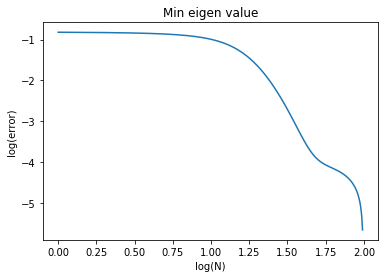

In [367]:
plot_difference_min()

Сходимость на 10 порядков медленее метода прямых итераций для макс с.ч.

In [321]:
def plot_min_eigenvalue():
    N = 10
    M = 500
    vals_shift = [np.log10(shift_iteration_method(i, M)[-1]) for i in range(1, N)]
    val_np = [np.log10(min(np.linalg.eigh(get_A(i))[0])) for i in range(1, N)]
    plt.plot([i for i in range(1, N) ], vals_shift, label='fixed_point')
    plt.plot([i for i in range(1, N) ], val_np, label='numpy')
    plt.xlabel('N')
    plt.ylabel('log(eigenvalue)')
    plt.title('Min eigenvalue')
    plt.legend()
    plt.show()  

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


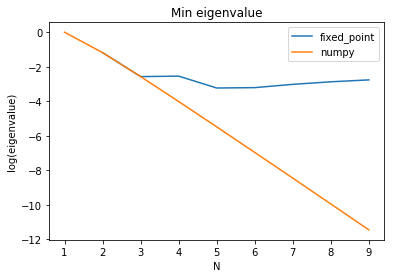

In [322]:
plot_min_eigenvalue()

Минимальное собственное число убывает экпоненциально, но начиная с 5 float32 не хватает, нужны более высокие точности.

## 9.3

In [353]:
def plot_condition_number():
    N = 10
    M = 500
    vals = [np.log10(fixed_point_iteration(i, M)[-1] / shift_iteration_method(i, M)[-1]) for i in range(1, N)]
    vals_np = [np.log10(max(np.linalg.eigh(get_A(i))[0]) / min(np.linalg.eigh(get_A(i))[0])) for i in range(1, N)]
    plt.plot([i for i in range(1, N) ], vals, label='fixed_point/shift')
    plt.plot([i for i in range(1, N) ], vals_np, label='numpy')
    plt.xlabel('N')
    plt.ylabel('log(eigenvalue)')
    plt.title('Condition number')
    plt.legend()
    plt.show()  

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


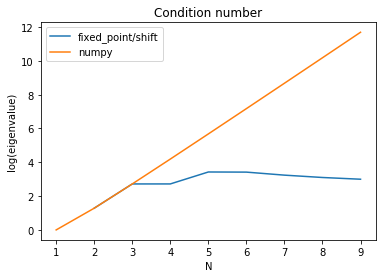

In [354]:
plot_condition_number()

Число обусловленности возрастает экпоненциально, при этом начиная с N = 5 погрешность становится слишком большой, так как с каждой итерацией скалярные произведения в методе прямых итераций со сдвигом тоже растут экспоненциально и не помещаются в float32. 

## 9.4

In [371]:
def get_shifted_A(N):
    A = get_A(N)
    i,j = np.indices(A.shape)
    alpha = fixed_point_iteration(N, 600)[-1] + 1e-7
    A[i == j] -= alpha
    return A

def eitkin_boost(N, M):
    A = get_shifted_A(N)
    prev = np.ones(N)
    cur = A @ prev
    alpha = fixed_point_iteration(N, 600)[-1] + 1e-7
    
    s_1 = np.dot(prev, cur) / np.dot(prev, prev) + alpha
    prev = cur
    cur = A @ prev
    
    s_2 = np.dot(prev, cur) / np.dot(prev, prev) + alpha
    prev = cur
    cur = A @ prev
    
    s_3 = np.dot(prev, cur) / np.dot(prev, prev) + alpha
    f = s_3 - (s_3 - s_2) ** 2 / (s_3 - 2 * s_2 + s_1)
    
    for i in range(M):
        prev = cur
        cur = A @ cur
        s_1 = s_2
        s_2 = s_3
        s_3 = np.dot(prev, cur) / np.dot(prev, prev) + alpha
        if s_3 - 2 * s_2 + s_1 != 0:
            f = s_3 - (s_3 - s_2) ** 2 / (s_3 - 2 * s_2 + s_1)
    return f

In [444]:
def plot_min_eigenvalue():
    N = 6
    M = 777
    vals_shift = [np.log10(shift_iteration_method(i, M)[-1]) for i in range(1, N)]
    val_np = [np.log10(min(np.linalg.eigh(get_A(i))[0])) for i in range(1, N)]
    vals_eitkin = [np.log10(eitkin_boost(i, M)) for i in range(1, N)]
    plt.plot([i for i in range(1, N) ], vals_shift, label='fixed_point')
    plt.plot([i for i in range(1, N) ], val_np, label='numpy')
    plt.plot([i for i in range(1, N) ], vals_eitkin, label='eitkin')
    plt.xlabel('N')
    plt.ylabel('log(eigenvalue)')
    plt.title('Min eigenvalue')
    plt.legend()
    plt.show()  

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


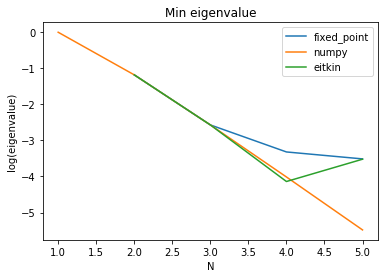

In [445]:
plot_min_eigenvalue()

Эйткин может дать сильный прирост к точности, но всё равно начиная с 5 float32 не справляется с экспоненицальным ростом.